In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # Para ignorar los warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split  # Para dividir los datos en train y test
from sklearn.utils import resample # Ponemos las mismas longitudes a cada variable

# Librerias para el modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Librerias para valorar el modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [123]:
df = pd.read_excel('C:/Users/jor14/Desktop/ALLpreprocessed.xlsx')

In [124]:
# Extraemos los datos (variable dependiente y variables independientes)
X = df.drop('Result', axis=1)
y = df['Result']

In [125]:
print(X.shape)

(50, 37)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, stratify=y, random_state=42)

In [127]:
print(X_train.shape)

(45, 37)


In [128]:
print(X_test.shape)

(5, 37)


In [129]:
# Ahora nuestras variables seran vectores
y_train = y_train.values
X_test = X_test.values
X_train = X_train.values
y_test = y_test.values

In [130]:
nombres_caracteristicas = X.columns
print(nombres_caracteristicas)

Index(['IL6', 'Ferritin', 'PCR', 'CD4', 'CD8', 'DimerD', 'Glucose',
       'Creatinin', 'GPT', 'Hemoglobina', 'Lymphocytes',
       'wavelet-LHH_firstorder_Skewness', 'wavelet-HLL_firstorder_Skewness',
       'wavelet-HHL_firstorder_Median', 'wavelet-HHL_glcm_ClusterShade',
       'wavelet-HHL_ngtdm_Busyness', 'wavelet-HHH_firstorder_Mean',
       'wavelet-HHH_firstorder_Median', 'square_ngtdm_Strength',
       'exponential_glszm_SmallAreaLowGrayLevelEmphasis',
       'gradient_firstorder_Minimum', 'Sex', 'Neurological_diseases',
       'Cardiovascular_diseases', 'Respiratory_diseases',
       'Days_hospitalization', 'GDS_2', 'GDS_3', 'GDS_4', 'GDS_5', 'GDS_6',
       'Barthel_scale_2', 'Barthel_scale_3', 'Barthel_scale_5',
       'Pulmonary_affectation_1', 'Pulmonary_affectation_2',
       'Pulmonary_affectation_4'],
      dtype='object')


In [131]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [132]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [133]:
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
n=9

In [134]:
print(feature_scores)

PCR                                                0.094271
Days_hospitalization                               0.077387
wavelet-HLL_firstorder_Skewness                    0.060552
GPT                                                0.053240
IL6                                                0.048340
Creatinin                                          0.045752
Ferritin                                           0.041141
wavelet-HHL_glcm_ClusterShade                      0.040534
Barthel_scale_3                                    0.039996
DimerD                                             0.039790
wavelet-HHL_firstorder_Median                      0.039384
gradient_firstorder_Minimum                        0.037494
wavelet-HHH_firstorder_Median                      0.037072
wavelet-HHH_firstorder_Mean                        0.031891
Glucose                                            0.029924
CD4                                                0.028625
CD8                                     

In [135]:
selected_features = feature_scores.index.values[:n]
print(selected_features)

cols_index = [X.columns.tolist().index(col) for col in selected_features]

['PCR' 'Days_hospitalization' 'wavelet-HLL_firstorder_Skewness' 'GPT'
 'IL6' 'Creatinin' 'Ferritin' 'wavelet-HHL_glcm_ClusterShade'
 'Barthel_scale_3']


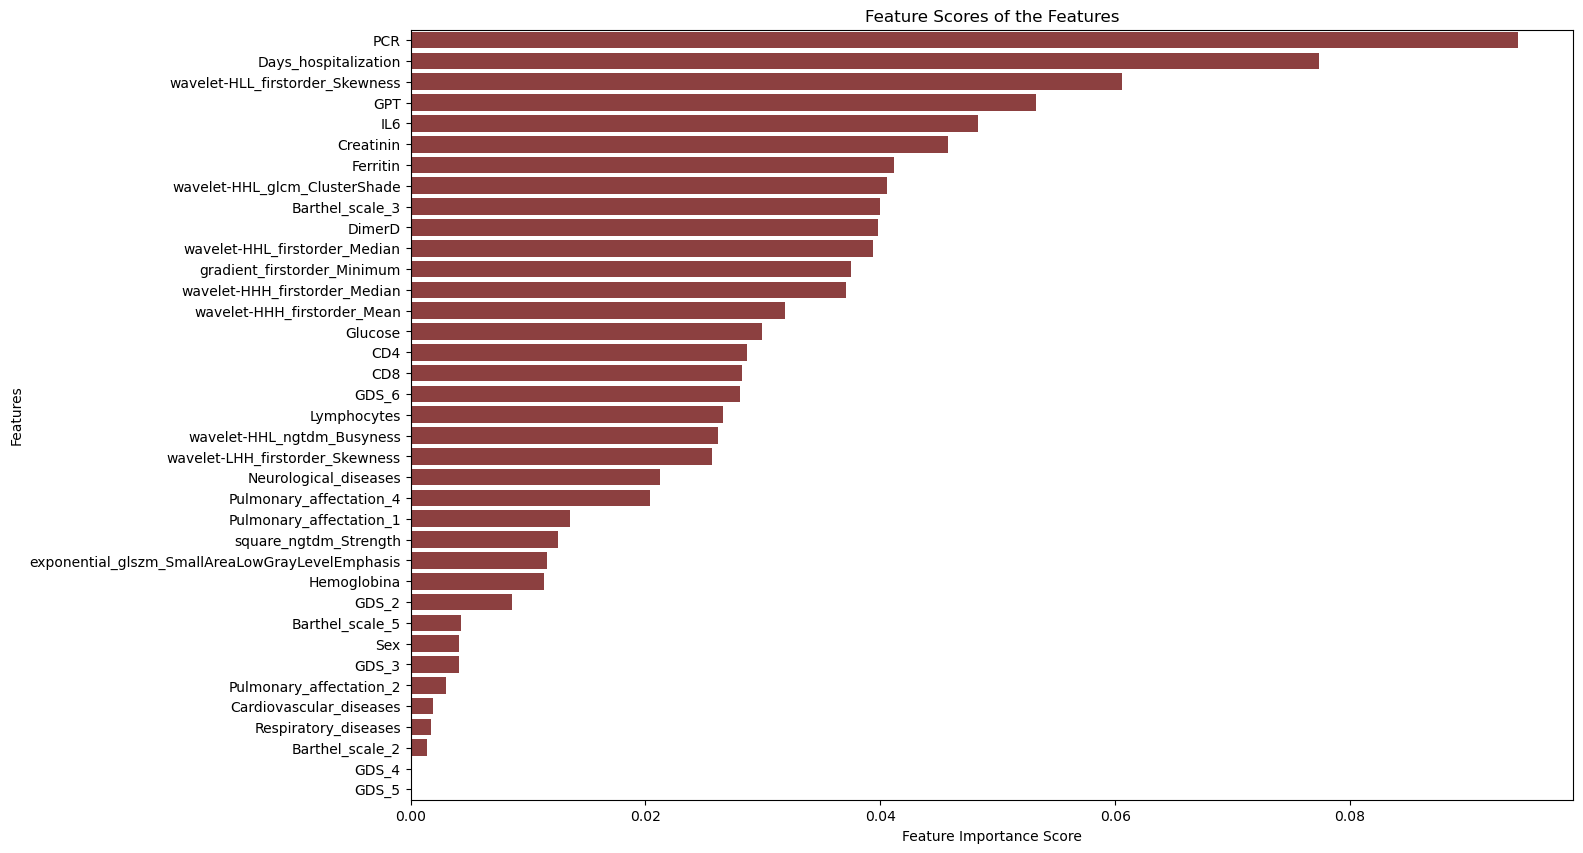

In [136]:
# Suponiendo que feature_scores es una Serie de pandas con nombres de características como índice y puntuaciones como valores
f, ax = plt.subplots(figsize=(15, 10))

# Crear el barplot con color granate y transparencia
sns.barplot(x=feature_scores.values, y=feature_scores.index, ax=ax, color='maroon', alpha= 0.8)  # (R, G, B, A) para RGBA

# Ajustar título y etiquetas
ax.set_title("Feature Scores of the Features")
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")

# Mostrar gráfico
plt.show()

In [137]:
X_train = X_train[:, cols_index]
X_test = X_test[:, cols_index]

In [138]:
# Ajustar el modelo de árbol de decisión
dt = DecisionTreeClassifier(random_state=42)

In [139]:
# Implementar validación cruzada
cv = StratifiedKFold(n_splits=5)
pred_cv = cross_val_predict(dt, X_train, y_train, cv=cv)

In [140]:
fpr, tpr, thresholds = roc_curve(y_train, pred_cv)
roc_auc = auc(fpr, tpr)

In [141]:
print(fpr)

[0.         0.57142857 1.        ]


In [142]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[1][1])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[0][0])

In [143]:
# Generar la matriz de confusión
mat_con = confusion_matrix(y_train, pred_cv)
mat_con = np.flipud(mat_con)
mat_con = np.fliplr(mat_con)

In [144]:
mat_con = (confusion_matrix(y_train, pred_cv))
mat_con = np.flipud(mat_con)
mat_con = np.fliplr(mat_con)

In [145]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, pred_cv)))
print('Precisión: {:.2f}'.format(precision_score(y_train, pred_cv)))
print('Recall: {:.2f}'.format(recall_score(y_train, pred_cv)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, pred_cv)))
print('AUC: {:.2f}'.format(auc(fpr, tpr)))
print('Matriz de confusión:')
print(mat_con)
print_confusion_matrix(y_train, pred_cv)

Accuracy: 0.58
Precisión: 0.71
Recall: 0.65
F1 Score: 0.68
AUC: 0.54
Matriz de confusión:
[[20 11]
 [ 8  6]]
True positive =  20
False positive =  8
False negative =  11
True negative =  6


In [146]:

# Obtener la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_train, pred_cv).ravel()

# Calcular la especificidad
especificidad = tn / (tn + fp)

print(f'Especificidad: {especificidad:.2f}')

Especificidad: 0.43


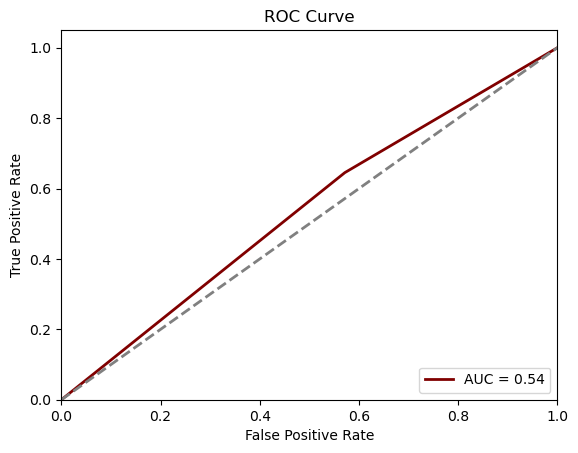

In [147]:
plt.figure()
plt.plot(fpr, tpr, color='maroon', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


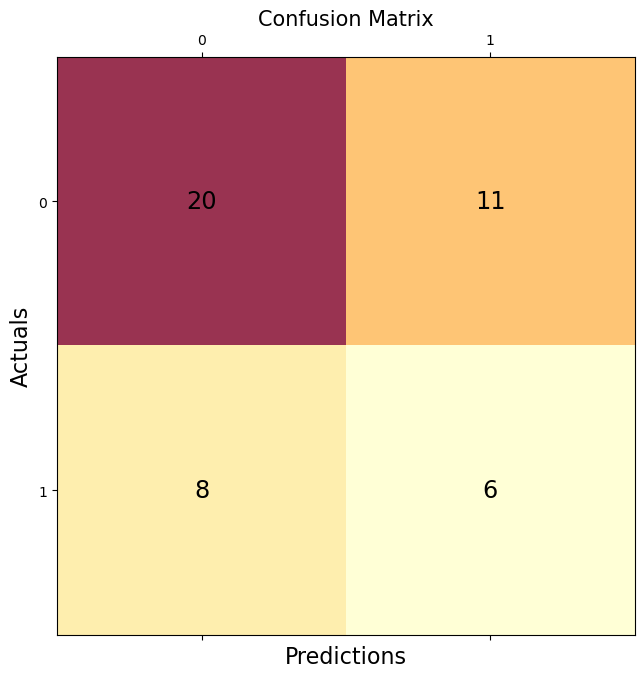

In [148]:
# Setting the attributes
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.8)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[n, m], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()